# Grade: /100 pts

# Assignment 06: Feature Selection and Regularization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LinearRegression, lasso_path
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', 500)

%matplotlib inline

# You're Still a Data Scientist!

Your models from the last assignment really impressed some in the management in your football club. Now that you have learned the art of regularization, your boss thinks you should do equally well with much less data. This will save a lot of money the next time around. This time you only get a data set with 3000 observations.

## Question 1: Preprocessing (5 pts)
Tasks:
* Load the data present in 'footballer_small.csv' using the pandas library and store the loaded data in a dataframe
* Drop the variables: 'ID','club','club_logo','flag', 'nationality','photo','potential', 'birth_date'
* Dummy code the variables: work_rate_att, work_rate_def, preferred_foot. **Because we are running a regularized model, we do not want to drop the first column**. If you want to understand why this is, have a look at the Jupyter notebook (`Ridge_And_Dummycoding.ipynb`).  
* Get a test data set of size 500 - to make results comparable to solutions, set random_state = 0
* visualize all variables of the first 50 observations of the Training data set as an image (see Lab06_followalong). You can also look at it as a data frame. How are the different variables scaled? Which variables have high and which ones have low values?    

To make sure that you get a good start - check the solutions from Assignment 4. And make sure you can apply these steps flexibly and quickly. **You will need it for the midterm!**

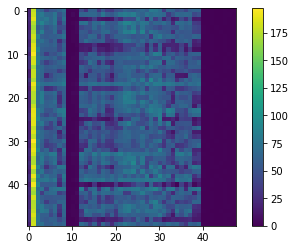

,age,height_cm,weight_kg,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,work_rate_att_High,work_rate_att_Low,work_rate_att_Medium,work_rate_def_High,work_rate_def_Low,work_rate_def_Medium,preferred_foot_Left,preferred_foot_Right
2858,20,178.0,69.0,61,38,52,54,62,71,1,2,2,46,29,61,61,31,53,35,33,48,51,63,59,56,62,66,59,81,77,70,34,64,62,47,52,41,59,62,62,0,0,1,0,0,1,0,1
723,21,182.0,77.0,80,66,64,76,49,64,1,4,2,63,64,66,66,55,77,60,54,65,77,83,78,84,67,62,75,69,73,70,66,34,52,67,65,67,66,43,48,0,0,1,0,0,1,1,0
1953,25,187.0,76.0,73,78,65,77,43,73,1,1,2,12,12,18,34,14,11,9,12,35,23,44,42,43,77,57,25,70,35,55,19,41,13,18,45,27,52,14,15,0,0,1,0,0,1,0,1
1981,21,175.0,77.0,89,72,66,78,33,63,1,3,4,73,74,49,69,65,80,57,55,55,75,90,89,78,67,78,74,55,66,64,71,59,24,72,68,62,68,35,33,0,0,1,0,0,1,0,1
137,19,168.0,59.0,69,53,59,68,44,48,1,2,4,42,50,49,67,51,66,59,52,60,67,77,63,81,54,76,60,57,50,43,54,55,49,47,65,57,60,42,40,1,0,0,1,0,0,0,1


In [2]:
# Load in data and display
data = pd.read_csv('footballer_small.csv')
data = data.drop(columns=['ID', 'club', 'club_logo', 'birth_date', 'flag', 'nationality', 'photo', 'potential'])
data = pd.get_dummies(data, columns=['work_rate_att', 'work_rate_def', 'preferred_foot'], drop_first=False)

# Get X and y
y = data.overall
X = data.drop('overall', axis = 'columns')

# Get test data of size 500
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=500, random_state=0)

plt.imshow(Xtrain[:50])
plt.colorbar()
plt.show()

Xtrain.head()

**Your written answer here** The different variables are at their default scales. The dark purple represents the features with low values. This means that features 9, 10, and 11 (international reputation, skill moves, and weak foot) all have lower values. Features 40 and beyond have low values as well, which are all of the dummy variables. Feature 0, the age, has a value more on the lower side as well. The highest values are yellow, which is the height in cm. The remaining values are in the mid ranges. 

## Question 2: Standardization  (10 pts)
When using regularized regression models, the scaling of the different regressors can influence the results dramatically (see lectures). One simple solution is to standardize all features before estimating the model, so that no feature can dominate others due to differences in feature scales. 

a) Use the sklearn class `StandardScaler` to produce a z-scale version of your training data set. Again visualize the the first 50 observations an image. Compare to the plot that you got in Question 1. What do you observe? 

b) Plot a histogram of the second column (height_cm) of the non-standarized and standardized training set. What is the mean and variance of the standardized training set. 

c) Build a model `pipeline` that first standarizes all the features in the training set and then fits a `LinearRegression` model. 


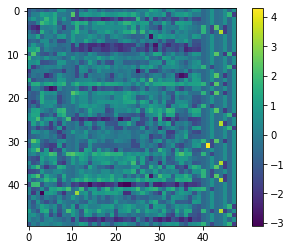

In [3]:
# answer to part a 

scaler = StandardScaler(with_mean=True, with_std=True)
X_scaled = scaler.fit_transform(Xtrain)

# Plot
plt.imshow(X_scaled[:50])
plt.colorbar()
plt.show()




**Written answer here** Upon observing this image, we can see that, rather than each feature being a different color, the high and low values are more spread out between observations. Looking closely, we can see which observations have higher and lower values for specific features in comparison to other observations. This occurred due to the scaling, since now all of the features are scaled in the same way. 

Mean of standardized training set:  -1.2937798980298491e-17
Variance of standardized training set:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


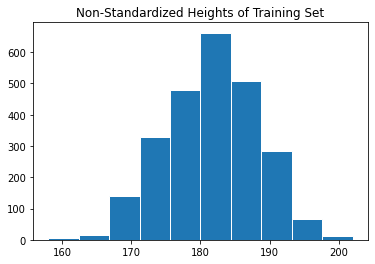

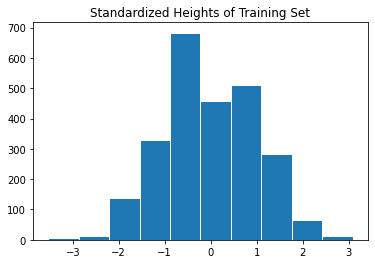

In [4]:
# b) Plot historgram 

mean = X_scaled.mean(axis=0).mean()
print('Mean of standardized training set: ', mean)
print('Variance of standardized training set: ', X_scaled.std(axis=0))

plt.hist(Xtrain['height_cm'], edgecolor='white')
plt.title('Non-Standardized Heights of Training Set')
plt.show()

plt.hist(X_scaled[:,1], edgecolor='white')
plt.title('Standardized Heights of Training Set')
plt.show()

**Written answer here** The mean of a standardized is always 0, or very close to it. As we can see from the results, the mean of the standardized training set is exactly -1.2937798980298491e-17, which is basically 0. The variance is 1.

In [5]:
# c: Build pipeline
# Make pipeline
model = Pipeline([
    ('standardize', StandardScaler()),
    ('linear_regression', LinearRegression())
])


## Question 3: Comparing different complex features (10 pts)
In this task, we will first consider a model that includes all the variables in the data AND all quadratic terms (i.e. each features to the power of two, and the products (interactions) between all possible pairs of features. 

a) Generate a design matrix for the model. You can use sklearn's `PolynomialFeatures` to do the job. Because sklearn's linear models have the option to fit the intercept, internally, set the `include_bias` option to `False`. 
* How many linear terms are in each of the new feature set?
* How many squared terms are in each of the new feature set?
* How many interaction terms are in each of the new feature set? Give an example of one of the interaction terms. 

b) Now generate 3 more models / design matrices. Again it should include all quadratic terms and 2-way interactions - but each model should drop one of the features
* Second Model: Drop `standing_tackle`
* Third Model: Drop `composure`
* Fourth model: Drop `marking`

Hint: For these models, create the design matrix without the aforementioned features and then apply polynomial expansion to the remaing features. 


In [6]:
# a) Make the new expanded design matrix 
poly = PolynomialFeatures(degree=2, include_bias=False)
Xtrain2 = poly.fit_transform(Xtrain)

poly_interactions = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_interactions = poly_interactions.fit_transform(Xtrain)

**Written answer here**

Number of linear terms is : 48

Number of squared terms is: 48

Number of interaction terms: ((48**2)-48)/2 = 1128, or 1176 if you include the linear terms

An example of an interaction term would be height_cm x weight_kg. Another example would be age x height_cm. 

In [7]:
# Make design matrices without one of the features
x_1 = Xtrain.drop(columns=['standing_tackle'])
X_1 = poly.fit_transform(x_1)

x_2 = Xtrain.drop(columns=['composure'])
X_2 = poly.fit_transform(x_2)

x_3 = Xtrain.drop(columns=['marking'])
X_3 = poly.fit_transform(x_3)


## Question 4: Evaluating the backward feature search (15 pts)
In this question, you have to use the pipeline created in question 2 and apply it to each of the models in question 3. Use 10-fold cross validation to report the validation error on the models using mean squared error as the metric. <br>
Show all the steps of the process and compare and analyze the results using the validation error reported. For this first step in the backwards search, which feature would you drop? 

In [8]:
# Your code here
cv_scores1 = cross_val_score(model, X_1, ytrain, cv=10, scoring='neg_mean_squared_error')
print('Cross Validated Performance without standing_tackle: ', -cv_scores1.mean())

cv_scores2 = cross_val_score(model, X_2, ytrain, cv=10, scoring='neg_mean_squared_error')
print('Cross Validated Performance without composure: ', -cv_scores2.mean())

cv_scores3 = cross_val_score(model, X_3, ytrain, cv=10, scoring='neg_mean_squared_error')
print('Cross Validated Performance without marking: ', -cv_scores3.mean())

Cross Validated Performance without standing_tackle:  2.7537469785285067
Cross Validated Performance without composure:  2.805989172741115
Cross Validated Performance without marking:  2.6968488010816793


**Written answer here**  For this first step, I would drop marking because the model without marking gives the lowest mean squared error from cross validation. 

## Question 5: Applying Ridge Regression (10 pts)
Build a pipeline that performs scaling and fits the ridge regression on the data that includes the polynomial expansion of all the features. The ridge parameter ($\lambda$ or `alpha` in sklearn) should be set to 0.5. Use the pipeline to report the validation error using mean square error metric. Use 10-fold cross validation. 

In [9]:
# Your code here
model2 = Pipeline([
    ('standardize', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('ridge', Ridge(alpha=0.5, fit_intercept=True))
])


cv_scores = cross_val_score(model2, Xtrain, ytrain, cv=10, scoring='neg_mean_squared_error')
print('Cross Validated Performance: ', -cv_scores.mean())


Cross Validated Performance:  2.2514089509607302


## Question 6: Tune the Ridge coefficient for the 2nd-order model (15 pts)
Perform the search going from $\lambda = \exp(-8), \cdots, \exp(6)$ in 15 evenly spaced increments on the log scale. 

For each setting of lambda, calculate the training error when fitting the regularized model to the entire trainign data set, and the prediction error by studying the performance on the left-out part using 10-fold cross-validation. (*Note this calculation can take a bit, be patient*)

Plot the mean squared training error and mean squared validation error as a function of $\log(\lambda)$. 

Note: Although you can ultimately use `GridSearchCV` from sklearn, in this task you need to program a for-loop interating over all the levels of $\lambda$.  

### Questions: 

What is the best regularization parameter? 

Why does the validation error increase as $\lambda \rightarrow 0$, while the training error decreases from the optimal value?  Why does both the training and the validation error increase when $\lambda \rightarrow \infty$?  Answer in terms of the bias variance trade off and model complexity.



Training Errors:  [0.69856651 0.69856843 0.6985818  0.69866743 0.69912624 0.70094232
 0.70579616 0.71491886 0.72856751 0.74657859 0.77165845 0.81327405
 0.89000237 1.03161494 1.29025845]

Cross Validation Errors:  [2.97023421 2.96227368 2.94175527 2.89282855 2.79345708 2.63853159
 2.46153993 2.2979224  2.15011116 2.00652679 1.86352952 1.73793669
 1.66850441 1.69693177 1.87491939]


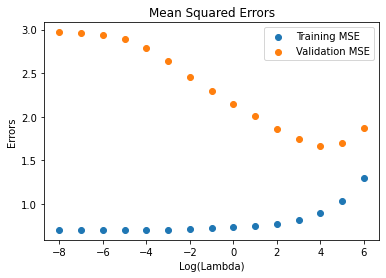

In [10]:
# Your code here
y = data.overall
X = data.drop('overall', axis = 'columns')

lam = np.exp(np.linspace(-8, 6, 15))
training_error = np.zeros(15)
val_error = np.zeros(15)

def get_pipeline(lam):
    model2 = Pipeline([
    ('standardize', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('ridge', Ridge(alpha=lam, fit_intercept=True))
])
    return model2

for i in range(lam.size):
    ridge = get_pipeline(lam[i])
    ridge.fit(Xtrain, ytrain)
    yp = ridge.predict(Xtrain)
    training_error[i] = mean_squared_error(ytrain, yp)
    cv_scores = cross_val_score(ridge, Xtrain, ytrain, cv=10, scoring='neg_mean_squared_error')
    val_error[i] = -cv_scores.mean()

print('\nTraining Errors: ', training_error)
print('\nCross Validation Errors: ', val_error)

plt.scatter(np.log(lam), training_error, label='Training MSE')
plt.scatter(np.log(lam), val_error, label='Validation MSE')
plt.title('Mean Squared Errors')
plt.xlabel('Log(Lambda)')
plt.ylabel('Errors')
plt.legend()
plt.show()


**Written answer here** 
The best regularization error is when lambda = exp(4), since this is where we hit lowest validation error.

The validation error increases as lambda approaches 0 because a lower lambda means a lower bias and a higher variance. This means that the model is overfitting the training data (thus the lower training error), resulting in an overly complex model. As lambda approaches infinity, the bias is becoming too high and the variance is becoming too low, surpassing the optimal results for the model and straying too far away from the trends of the data; this means that the model is not complex enough. 

## Question 7: Test error  (10 pts)
Now fit the model using ridge regression, using the lambda-value that you determined works best (in terms of crossvalidated mse) from Question 6. Fit the model on the whole training set. 

Report the mean squared error on the test data - along with the 95% confidence interval, determined with the central limit theorem (remember assignment 5). 

In [11]:
# Your code here
ridge = get_pipeline(np.exp(4))
ridge.fit(Xtrain, ytrain)
yp = ridge.predict(Xtest)
mse = mean_squared_error(ytest, yp)
test_errors = ((ytest - yp)**2)

n = ytest.size
quantile = 1.96 # 95% confidence
estimated_standard_error = np.std(test_errors)/np.sqrt(n)
bounds = mse + quantile * estimated_standard_error * np.array([-1,1])

print('Mean Squared Error on the test data: ', mse)
print('95% Confidence Interval: ', bounds)

Mean Squared Error on the test data:  1.8810352698981474
95% Confidence Interval:  [1.54861205 2.21345849]


## Question 8: Lasso Regression (10 pts)
That's great! You can achieve a really good prediction accuracy with much less data than in Week 5. Impressive! 

Now the problem is that the model is really hard to interpret and explain to clients- the importance of each feature is not easily apparent. So let's build a simpler model, which is only based on the first nine features:
* age
* height_cm
* weight_kg 
* pac: ???  
* sho: shooting 
* pas: passing 
* dri: dribble 
* def: defense
* phy: Physiological VO2 max

Build a design matrix using only these nine features. Standardize the design matrix using the standard scalar. 
Then use `sklearn.linear_model.lasso_path` to create a plot of the regression coefficients against the log-regularization parameter (see `Lab06_followalong`). Note that it is standard practice to plot on the x-axis the negative log-lambda values, such that the high regularization (and hence the simpler models) are on the left. 

Which of the 9 variables drops out of the predicitive model first? Which one is retained for the longest time? 

minmum regularization parameter : 0.022393140050754882
maximum regularization parameter : 4.478628010150977


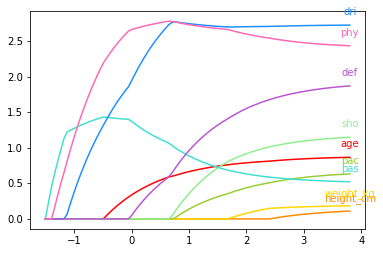

In [12]:
# Make a new, reduced design matrix 
simple_data = data[['age', 'height_cm', 'weight_kg', 'pac', 'sho', 'pas', 'dri', 'def', 'phy']]

scaler = StandardScaler(with_mean=True, with_std=True)
X_simple = scaler.fit_transform(simple_data)

# Create a lasso path 
eps = 5e-3 # The smaller eps, the longer the path  
lambda_lasso, coefs_lasso, _ = lasso_path(X_simple, y, eps, n_alphas=100, alphas= None, fit_intercept=False)

print(f"minmum regularization parameter : {np.amin(lambda_lasso)}")
print(f"maximum regularization parameter : {np.amax(lambda_lasso)}")

# Plot the lasso path
colors = ['red', 'darkorange', 'gold', 'yellowgreen', 'lightgreen', 'turquoise', 'dodgerblue', 'mediumorchid', 'hotpink']
labels = ['age', 'height_cm', 'weight_kg', 'pac', 'sho', 'pas', 'dri', 'def', 'phy']
neg_log_lambda = -np.log(lambda_lasso)
for i in range(9):
    l1 = plt.plot(neg_log_lambda, coefs_lasso[i,], c=colors[i])
    label = labels[i]
    plt.annotate(label, # this is the text
                 (neg_log_lambda[-1],coefs_lasso[i,-1]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                 color=colors[i]) # horizontal alignment can be left, right or center


**Written answer here** Height_cm drops out of the predictive model first. Passing is retained for the longest time. 

## Question 9: Tuning the lasso coefficient 
We now want to find a model that is both simple (explainable), but at the same time yields still relatively decent predictions. To assess this, vary the regularization constant of the lasso model between exp(2) end exp(-3.5). That is, vary negative log lambda between -2 and 3.5 in even steps. 
Plot the crossvalidation error (mean squared error) against negative-log-lambda of the model. 

Hint: You can either program a for-loop as in Question 6, or use the function `GridSearchCV`. 

What is the simplest model that still gives you a expected validation error of below 15? 
If you wanted the best validation error, what $\lambda$ would you need to use?

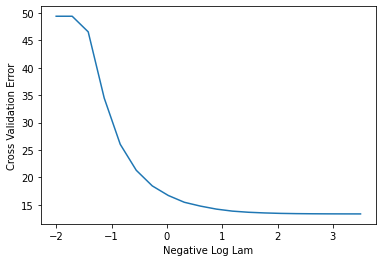

[13.3255563  13.32991752 13.33733717 13.35134382 13.37692267 13.42264749
 13.5052146  13.62829907 13.8351215  14.20387273 14.75506451 15.44992607
 16.68905519 18.43815907 21.28779476 26.02874468 34.46161456 46.54797131
 49.39596437 49.39596437]
[ 3.5         3.21052632  2.92105263  2.63157895  2.34210526  2.05263158
  1.76315789  1.47368421  1.18421053  0.89473684  0.60526316  0.31578947
  0.02631579 -0.26315789 -0.55263158 -0.84210526 -1.13157895 -1.42105263
 -1.71052632 -2.        ]


In [13]:
# Your code here
lasso = Lasso(fit_intercept=True)
lams = {'alpha': np.exp(np.linspace(-3.5, 2, 20))}
grid = GridSearchCV(lasso, lams, scoring='neg_mean_squared_error', cv=5)
grid.fit(X_simple, y)
scores = grid.cv_results_['mean_test_score']
scores = scores * -1

neg_log_lams = -np.log(np.exp(np.linspace(-3.5, 2, 20)))
plt.xlabel('Negative Log Lam')
plt.ylabel('Cross Validation Error')
plt.plot(neg_log_lams, scores)
plt.show()

print(scores)
print(neg_log_lams)


**Written answer here** The simplest model that still gives an expected validation error of below 15 would be a model where lambda is about exp(-0.6). To get the best validation error, you need to make lambda = exp(-3.5).

## Question  10: Lasso vs. Ridge
In this quesiton, we will compare Ridge regression and Lasso solutions on the model defined in Question 8. Make sure you are using a standardized design matrix for this task. 

Fit the model using Ridge (L2- regularization, $\lambda = exp(-3)$) and Lasso (L1-regularization, $\lambda = exp(-0.5)$. Then print out the regression coefficients for each of the nine features in the design matrix. 

Based on the coefficients, which one is the most important feature in the Ridge vs. Lasso solution? How many features are contributing to the prediction for each solution? How can this difference be explained? 


In [14]:
# Your code here
#[['age', 'height_cm', 'weight_kg', 'pac', 'sho', 'pas', 'dri', 'def', 'phy']]

l2 = np.exp(-3)
l1 = np.exp(-0.5)

ridge = Ridge(alpha=l2, fit_intercept=True)
ridge.fit(X_simple, y)

lasso = Lasso(alpha=l1, fit_intercept=True)
lasso.fit(X_simple, y)

print('Ridge Coefficients: ', ridge.coef_)
print('Lasso Coefficients: ', lasso.coef_)

Ridge Coefficients:  [0.88426764 0.1460632  0.19598203 0.67443542 1.19418679 0.50068645
 2.73200408 1.93560663 2.39988687]
Lasso Coefficients:  [0.54524153 0.         0.         0.         0.         1.12133451
 2.59312111 0.49537657 2.76030669]


**Written answer here** The most important feature in the Ridge solution is dribble, and all 9 features are contributing to the prediction since none of the coefficients can be set to zero. The most important feature in the Lasso solution is Physiological V02 max, and only 5 features are contributing to the prediction. There is a difference because, in Lasso regression, coefficients can be forced to 0 in order to further simplify the model. Lasso penalizes the sum of absolute values of the coefficients, and ridge regression penalizes the sum of squared coefficients; these differences can cause variations in the coefficients for each solution.